# 03 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `03_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_03` folder, in which you create another folder called `data`
4. Copy paste the notebook `03_Homework` from the lectures repo to the working-folder. Copy the csv files `movies.csv` and `movies_metadata.csv` into the `working-folder/Session_03/data` directory.
5. Do the exercises on 03_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 21st 08:59 am CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## 1. Exploration and data cleaning (6 points)

**1.1. Read the dataset `movies.csv` and visualise it**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('E:/ESMT-prog/Working_Directory/Session_03/data/movies.csv')

df


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,NaN,NaN
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,NaN,NaN
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,NaN,NaN
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,NaN,NaN


**1.2 Display the size and the number of missing data points per column of the DataFrame**

In [9]:
print(df.shape[0])
print(df.shape[1])
#missing data:
print(df.isnull().sum())

9999
9
MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64


**1.3 Fill the NaN and replace the original dataset**
- YEAR: 'Unknown'
- GENRE: 'Unknown'
- RATING: with the median value
- VOTES: 0

We leave the NaN of RunTime and Gross for now, as there is no straightforward way to fill them.

In [13]:
df['YEAR'] = df['YEAR'].fillna('Unknown')
df['GENRE'] = df['GENRE'].fillna('Unknown')
median_rating = df['RATING'].median()
df['RATING'] = df['RATING'].fillna(median_rating)
df['VOTES'] = df['VOTES'].fillna(0)

# Let us check it it's all right
print(df.isnull().sum())



MOVIES         0
YEAR           0
GENRE          0
RATING         0
ONE-LINE       0
STARS          0
VOTES          0
RunTime     2958
Gross       9539
dtype: int64


**1.4 Drop the duplicated rows**

In [14]:
# Drop duplicate rows
df = df.drop_duplicates()


**1.5 Replace the columns names to make them all lowercase**

In [15]:
# Replace column names to make them all lowercase
df.columns = df.columns.str.lower()


In [16]:
df.columns

Index(['movies', 'year', 'genre', 'rating', 'one-line', 'stars', 'votes',
       'runtime', 'gross'],
      dtype='object')

**1.6 Convert the `votes` column into a `float type`**

*Hint: the U.K. and U.S. use a comma to separate groups of thousands. You might need to remove this comma first before converting the numbers*

In [27]:
df['votes'] = df['votes'].replace(',', '')

df['votes'] = df['votes'].astype(float)


## 2. Descriptive statistics (5 points)

**2.1 What is the average rating?**

In [28]:
average_rating = df['rating'].mean()

print(f"The average rating is {average_rating:.2f}.")


The average rating is 6.95.


**2.2 What is the maximum runtime?**

In [30]:
max_runtime = df['runtime'].max()

print(f"The maximum runtime is {max_runtime} minutes.")


The maximum runtime is 853.0 minutes.


**2.3 Filter the dataset to show which movie/serie has the longest runtime**

In [31]:
longest_movie = df[df['runtime'] == max_runtime]


print("Movie(s)/Series with the longest runtime:")
print(longest_movie[['movies', 'runtime']])


Movie(s)/Series with the longest runtime:
                        movies  runtime
1902  El tiempo entre costuras    853.0


**2.4 Plot the histogram of runtimes, filtering on (0, 200) range with 200 bins**

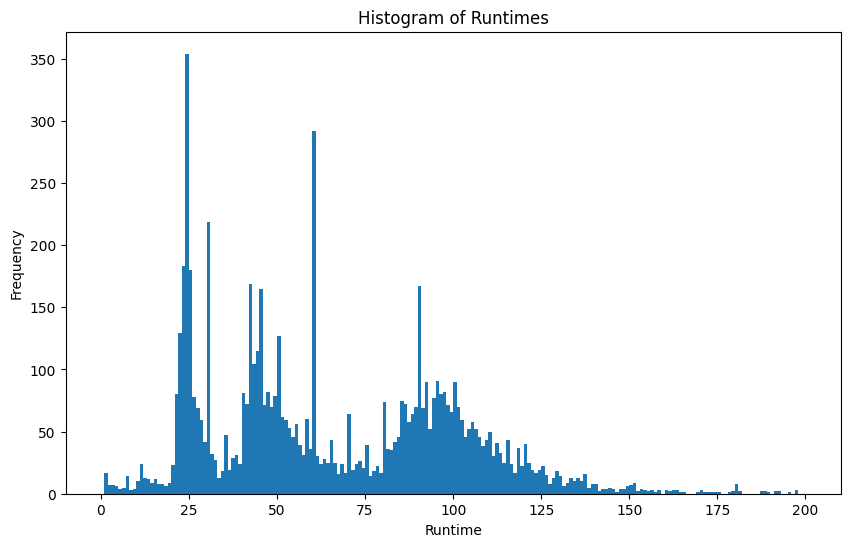

In [37]:
# Filtering between 0 and 200 then creating the plot, let's go!
runtime_filtered = df['runtime'][(df['runtime'] > 0) & (df['runtime'] <= 200)]

plt.figure(figsize=(10, 6))
plt.hist(runtime_filtered, bins=200, range=(0, 200))
plt.title('Histogram of Runtimes')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()


**2.5 What is the number of votes a movie needs to have, to be in the top 10% most voted film?**

*Tip: the 90th quantile*

In [41]:
votes_top10 = df['votes'].quantile(0.90)

print("the number of votes a movie needs is more then: " + str(votes_top10))


the number of votes a movie needs is more then: 22193.100000000035


## 3. Merging datasets (4 points)

**Read `movies_metadata.csv` and assign it to a `df_meta` variable**

**Create a `merge_df` DataFrame from an `inner join` between `df` and `df_meta`**

*Hint: you need to find the right key to join on*

In [53]:

# Reading metadata
df_meta = pd.read_csv('E:\ESMT-prog\Working_Directory\Session_03\data\movies_metadata.csv')

# The key is standardising the titles, we have them now in lower case.
df['title_lower'] = df['movies'].str.lower().str.strip()
df_meta['title_lower'] = df_meta['title'].str.lower().str.strip()

# Now we can do the inner join
df.set_index('title_lower', inplace=True)
df_meta.set_index('title_lower', inplace=True)
join_df = df.join(df_meta, how='inner', lsuffix='_df', rsuffix='_meta')

print(join_df.head())


<>:2: SyntaxWarning: invalid escape sequence '\E'
<>:2: SyntaxWarning: invalid escape sequence '\E'
C:\Users\Asus\AppData\Local\Temp\ipykernel_17796\3973124822.py:2: SyntaxWarning: invalid escape sequence '\E'
  df_meta = pd.read_csv('E:\ESMT-prog\Working_Directory\Session_03\data\movies_metadata.csv')


                            movies         year  \
title_lower                                       
the walking dead  The Walking Dead  (2010–2022)   
the walking dead  The Walking Dead  (2010–2022)   
lucifer                    Lucifer  (2016–2021)   
the good doctor    The Good Doctor     (2017– )   
supernatural          Supernatural  (2005–2020)   

                                                  genre  rating  \
title_lower                                                       
the walking dead  \nDrama, Horror, Thriller                 8.2   
the walking dead  \nDrama, Horror, Thriller                 8.2   
lucifer             \nCrime, Drama, Fantasy                 8.1   
the good doctor                     \nDrama                 8.1   
supernatural       \nDrama, Fantasy, Horror                 8.4   

                                                           one-line  \
title_lower                                                           
the walking dead  \nSheriff De

C:\Users\Asus\AppData\Local\Temp\ipykernel_17796\3973124822.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta = pd.read_csv('E:\ESMT-prog\Working_Directory\Session_03\data\movies_metadata.csv')
